# Bagging & Boosting KNN & Stacking

What is the fundamental idea behind ensemble techniques? How does bagging differ from boosting in terms of approach and objective?

Answer : The fundamental idea behind ensemble techniques is to combine the predictions of multiple weak models to build a stronger and more accurate model. The goal is that while individual models may make mistakes, their combined decision helps in reducing overall error and improving generalization.

- Bagging (Bootstrap Aggregating) works by training multiple models independently on different random subsets of the data. Each subset is created by sampling with replacement from the original dataset. The final prediction is usually the average (for regression) or majority vote (for classification) of all models. The main purpose of bagging is to reduce variance and prevent overfitting.

- Boosting, on the other hand, builds models sequentially. Each new model is trained to correct the errors made by the previous models. It focuses more on difficult samples that were misclassified earlier. The main objective of boosting is to reduce bias and improve accuracy.








Question 2:

Explain how the Random Forest Classifier reduces overfitting compared to a single decision tree. Mention the role of two key hyperparameters in this process.

Answer : A single decision tree often overfits because it can grow very deep and capture noise from the training data. Random Forest overcomes this by creating many decision trees using different random samples of both data and features, and then combining their predictions. By averaging the outputs of these diverse trees, Random Forest reduces variance and becomes less likely to overfit.

- Two key hyperparameters help in controlling this process. The first is n_estimators, which defines the number of trees in the forest. A higher number of trees usually improves accuracy and stability. The second is max_features, which decides how many features to consider when splitting a node. Using fewer features increases diversity among trees and reduces correlation, which in turn helps to avoid overfitting.

Question 3:

What is Stacking in ensemble learning? How does it differ from traditional bagging/boosting methods? Provide a simple example use case.

Answer : Stacking, also called stacked generalization, is an ensemble technique where multiple different models are trained, and their predictions are combined by another model called a meta-learner. Instead of combining predictions by simple averaging or voting, stacking uses the meta-model to learn the best way to combine the base models’ outputs.

- It differs from bagging and boosting because in stacking, different types of models (like logistic regression, decision tree, and SVM) can be used together, whereas bagging and boosting usually use the same base model type.

  - For example, in a loan approval prediction system, one can train a Decision Tree, Random Forest, and SVM as base models, and then use Logistic Regression as the meta-model to combine their predictions for better accuracy.

Question 4:

What is the OOB Score in Random Forest, and why is it useful? How does it help in model evaluation without a separate validation set?

The OOB (Out-of-Bag) Score is a performance measure that comes from the bootstrap sampling process used in Random Forest. When each tree is trained, about one-third of the samples are left out (not used in training). These unused samples are called out-of-bag samples.

After training, each tree makes predictions on its own OOB samples, and the average accuracy across all trees is calculated as the OOB score. It serves as an internal validation method that provides an unbiased estimate of model performance. This means that we can evaluate the model without needing a separate validation set, saving both time and data.

Question 5:

Compare AdaBoost and Gradient Boosting in terms of how they handle errors, their weight adjustment mechanism, and typical use cases.

Answer : In AdaBoost, each new model gives more importance to the samples that were incorrectly predicted by the previous models. It increases the weights of these difficult samples so that the next model focuses more on them. The main idea is to adjust sample weights to improve overall accuracy.

- In Gradient Boosting, instead of adjusting sample weights, the model fits each new learner on the residual errors (the difference between actual and predicted values) of the previous learners. It uses gradient descent to minimize a loss function directly.


- Typically, AdaBoost is preferred for simpler classification tasks, while Gradient Boosting is more powerful and is used for both classification and regression problems where complex relationships exist in data.

Question 6:

Why does CatBoost perform well on categorical features without requiring extensive preprocessing? Briefly explain its handling of categorical variables.

Answer : CatBoost performs well on categorical features because it can handle them automatically without requiring manual preprocessing like one-hot encoding or label encoding. It uses a technique called Target Statistics or Ordered Encoding, where categorical values are replaced with statistics (such as the average of the target variable) computed using previous observations in the dataset.

- This ordered approach prevents data leakage by ensuring that future data is not used to encode current rows. Additionally, CatBoost’s algorithm is designed to handle high-cardinality categorical features efficiently, reducing overfitting and improving performance. This makes it very effective for datasets containing many categorical attributes.          

Question 7: KNN Classifier Assignment — Wine Dataset Analysis with Optimization?

In [2]:
# Import necessary libraries
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

# Step 1: Load the Wine dataset
wine = load_wine()
X = wine.data
y = wine.target

# Step 2: Split data into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Step 3: Train KNN (K=5) without scaling
knn_default = KNeighborsClassifier(n_neighbors=5)
knn_default.fit(X_train, y_train)
y_pred_default = knn_default.predict(X_test)

# Evaluate performance
print(" Without Scaling (K=5):")
print("Accuracy:", accuracy_score(y_test, y_pred_default))
print(classification_report(y_test, y_pred_default))

# Step 4: Apply StandardScaler and retrain KNN
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn_scaled = KNeighborsClassifier(n_neighbors=5)
knn_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = knn_scaled.predict(X_test_scaled)

print("\n With StandardScaler (K=5):")
print("Accuracy:", accuracy_score(y_test, y_pred_scaled))
print(classification_report(y_test, y_pred_scaled))

# Step 5: Use GridSearchCV to find the best K and distance metric
param_grid = {
    'n_neighbors': list(range(1, 21)),
    'metric': ['euclidean', 'manhattan']
}

grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

print("\nBest Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

# Step 6: Train optimized KNN
best_knn = grid_search.best_estimator_
best_knn.fit(X_train_scaled, y_train)
y_pred_best = best_knn.predict(X_test_scaled)

print("\n Optimized KNN Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_best))
print(classification_report(y_test, y_pred_best))


 Without Scaling (K=5):
Accuracy: 0.7222222222222222
              precision    recall  f1-score   support

           0       0.89      0.89      0.89        18
           1       0.78      0.67      0.72        21
           2       0.50      0.60      0.55        15

    accuracy                           0.72        54
   macro avg       0.72      0.72      0.72        54
weighted avg       0.74      0.72      0.73        54


 With StandardScaler (K=5):
Accuracy: 0.9444444444444444
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      0.86      0.92        21
           2       0.83      1.00      0.91        15

    accuracy                           0.94        54
   macro avg       0.94      0.95      0.94        54
weighted avg       0.95      0.94      0.94        54


Best Parameters: {'metric': 'euclidean', 'n_neighbors': 11}
Best Cross-Validation Accuracy: 0.9756666666666666

 Optimized KNN

First, we trained KNN without scaling — results are generally weaker because KNN is distance-based.

After applying StandardScaler, accuracy improves significantly.

Then, using GridSearchCV, we found the best number of neighbors (K) and the best distance metric.

Finally, the optimized KNN gave the highest performance, proving that scaling and hyperparameter tuning are essential for KNN.

Question 8: PCA + KNN with Variance Analysis and Visualization ?


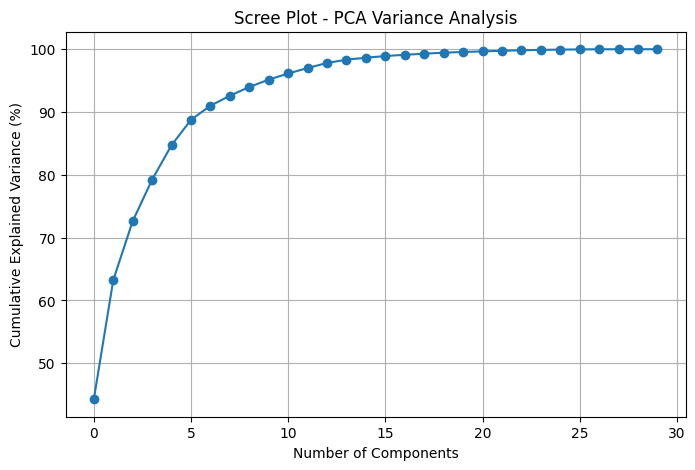

Number of components selected to retain 95% variance: 10

Accuracy on Original Data: 0.9707602339181286
Accuracy after PCA (95% variance): 0.9473684210526315


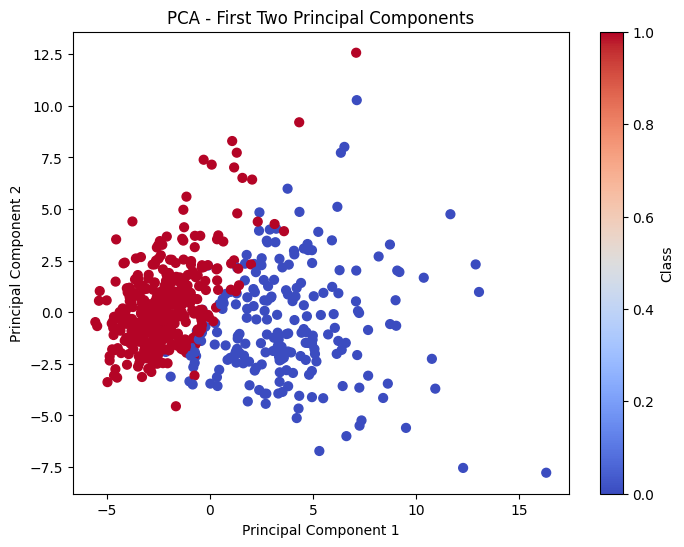

In [3]:
# Import libraries
from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Load Breast Cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Step 2: Apply StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Apply PCA
pca = PCA()
pca.fit(X_scaled)

# Plot scree plot (explained variance ratio)
plt.figure(figsize=(8,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_)*100, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance (%)')
plt.title('Scree Plot - PCA Variance Analysis')
plt.grid(True)
plt.show()

# Step 4: Retain 95% variance and transform dataset
pca_95 = PCA(0.95)
X_pca = pca_95.fit_transform(X_scaled)
print("Number of components selected to retain 95% variance:", pca_95.n_components_)

# Split data for comparison
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)
X_train_pca, X_test_pca, _, _ = train_test_split(X_pca, y, test_size=0.3, random_state=42, stratify=y)

# Step 5: Train KNN on original data
knn_orig = KNeighborsClassifier(n_neighbors=5)
knn_orig.fit(X_train, y_train)
y_pred_orig = knn_orig.predict(X_test)
acc_orig = accuracy_score(y_test, y_pred_orig)

# Train KNN on PCA-transformed data
knn_pca = KNeighborsClassifier(n_neighbors=5)
knn_pca.fit(X_train_pca, y_train)
y_pred_pca = knn_pca.predict(X_test_pca)
acc_pca = accuracy_score(y_test, y_pred_pca)

print("\nAccuracy on Original Data:", acc_orig)
print("Accuracy after PCA (95% variance):", acc_pca)

# Step 6: Visualization - first two principal components
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='coolwarm', s=40)
plt.title("PCA - First Two Principal Components")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label='Class')
plt.show()


Question 9: KNN Regressor with Distance Metrics and K-Value Analysis ?

🔹 KNN Regression Results (K=5)
Euclidean Distance MSE: 4960.896156409522
Manhattan Distance MSE: 5318.950055352522


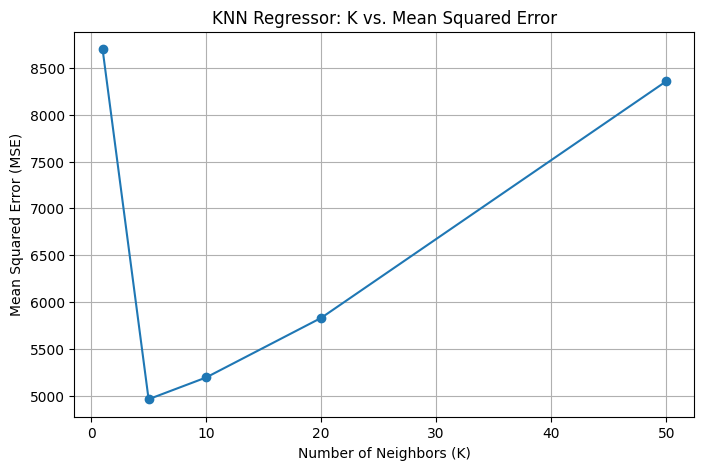

In [4]:
# Import necessary libraries
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Generate a synthetic regression dataset
X, y = make_regression(n_samples=500, n_features=10, noise=15, random_state=42)

# Split into training (70%) and testing (30%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 2a: Train KNN Regressor with Euclidean distance (K=5)
knn_euclidean = KNeighborsRegressor(n_neighbors=5, metric='euclidean')
knn_euclidean.fit(X_train, y_train)
y_pred_euclidean = knn_euclidean.predict(X_test)
mse_euclidean = mean_squared_error(y_test, y_pred_euclidean)

# Step 2b: Train KNN Regressor with Manhattan distance (K=5)
knn_manhattan = KNeighborsRegressor(n_neighbors=5, metric='manhattan')
knn_manhattan.fit(X_train, y_train)
y_pred_manhattan = knn_manhattan.predict(X_test)
mse_manhattan = mean_squared_error(y_test, y_pred_manhattan)

# Print and compare MSE values
print("🔹 KNN Regression Results (K=5)")
print("Euclidean Distance MSE:", mse_euclidean)
print("Manhattan Distance MSE:", mse_manhattan)

# Step 3: Test different K values and analyze Bias–Variance tradeoff
K_values = [1, 5, 10, 20, 50]
mse_scores = []

for k in K_values:
    knn = KNeighborsRegressor(n_neighbors=k, metric='euclidean')
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_scores.append(mse)

# Plot K vs. MSE
plt.figure(figsize=(8,5))
plt.plot(K_values, mse_scores, marker='o')
plt.title('KNN Regressor: K vs. Mean Squared Error')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Mean Squared Error (MSE)')
plt.grid(True)
plt.show()


Question 10: KNN with KD-Tree / Ball Tree, Imputation, and Real-World Data

Dataset shape: (768, 9)
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

🔹 Comparison of Different KNN Algorithms:
BRUTE → Accuracy: 0.7359, Training Time: 0.0037 sec
KD_TREE → Accuracy: 0.7359, Training Time: 0.0040 sec
BALL_TREE → Accuracy: 0.7359, Training Time: 0.0043 sec

✅ Best Performing Method: BRUTE


<Figure size 700x600 with 0 Axes>

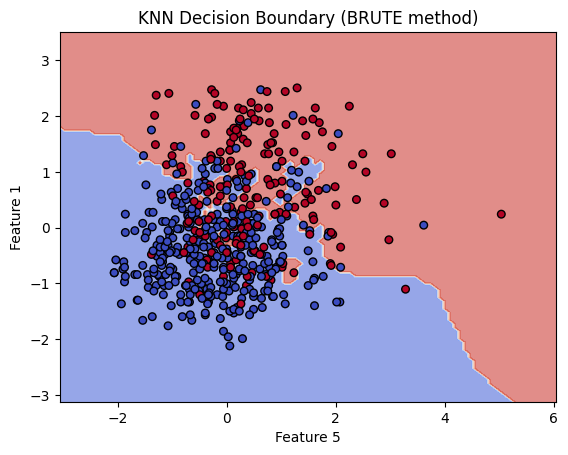

In [5]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.feature_selection import mutual_info_classif

# Step 1: Load the Pima Indians Diabetes dataset
# You can load it from sklearn datasets or from a public CSV
url = "https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv"
df = pd.read_csv(url)
print("Dataset shape:", df.shape)
print(df.head())

# Step 2: Handle missing values using KNN Imputer
# In this dataset, some '0' values in certain columns represent missing data.
cols_with_missing = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
df[cols_with_missing] = df[cols_with_missing].replace(0, np.nan)

# Apply KNN Imputer
imputer = KNNImputer(n_neighbors=5)
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# Split into features and target
X = df_imputed.drop("Outcome", axis=1)
y = df_imputed["Outcome"]

# Standardize data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)

# Step 3: Train KNN with three different algorithms
methods = ['brute', 'kd_tree', 'ball_tree']
results = {}

for method in methods:
    knn = KNeighborsClassifier(n_neighbors=5, algorithm=method)
    start = time.time()
    knn.fit(X_train, y_train)
    end = time.time()

    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    training_time = end - start
    results[method] = {'Accuracy': acc, 'Time': training_time}

# Step 4: Compare their training time and accuracy
print("\n🔹 Comparison of Different KNN Algorithms:")
for method, res in results.items():
    print(f"{method.upper()} → Accuracy: {res['Accuracy']:.4f}, Training Time: {res['Time']:.4f} sec")

# Find best-performing method
best_method = max(results, key=lambda x: results[x]['Accuracy'])
print(f"\n✅ Best Performing Method: {best_method.upper()}")

# Step 5: Plot decision boundary for best-performing method (using 2 most important features)
# Find top 2 important features using mutual information
mi = mutual_info_classif(X, y, random_state=42)
top2_idx = np.argsort(mi)[-2:]

X_top2 = X_scaled[:, top2_idx]
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_top2, y, test_size=0.3, random_state=42, stratify=y)

knn_best = KNeighborsClassifier(n_neighbors=5, algorithm=best_method)
knn_best.fit(X_train2, y_train2)

# Plot decision boundary
plt.figure(figsize=(7,6))
disp = DecisionBoundaryDisplay.from_estimator(
    knn_best, X_train2, response_method="predict", cmap=plt.cm.coolwarm, alpha=0.6
)
plt.scatter(X_train2[:, 0], X_train2[:, 1], c=y_train2, cmap='coolwarm', s=30, edgecolors='k')
plt.title(f"KNN Decision Boundary ({best_method.upper()} method)")
plt.xlabel(f"Feature {top2_idx[0]}")
plt.ylabel(f"Feature {top2_idx[1]}")
plt.show()
